In [1]:
import string
import os
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# If two files with positive and negative review respectively

In [2]:
# def load_doc(filename):
#     file=open(filename,'r')
#     text=file.read()
#     file.close()
#     return text

In [3]:
# data=[]
# label=[]


In [4]:
# pos_path='C:/Users/nikhi/Downloads/review_polarity/txt_sentoken/pos/'
# neg_path='C:/Users/nikhi/Downloads/review_polarity/txt_sentoken/neg/'

In [5]:
# for i in os.listdir(pos_path):
#     data.append(load_doc(pos_path+i))
#     label.append(1)

In [6]:
# for i in os.listdir(neg_path):
#     data.append(load_doc(neg_path+i))
#     label.append(0)

In [7]:
# df=pd.DataFrame({'review':data,'label':label})

In [261]:
df=pd.read_csv('C:/Users/nikhi/Downloads/movie.csv/movie.csv')

In [225]:
df.shape

(40000, 2)

In [226]:
df.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [11]:
#df = df.sample(frac=1).reset_index(drop=True)

In [155]:
df.isna().sum()

text     0
label    0
dtype: int64

In [156]:
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

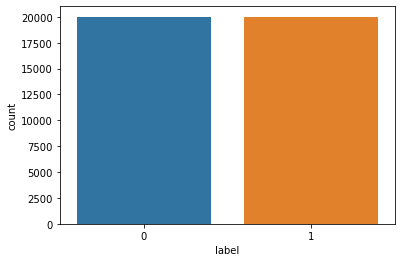

In [157]:
sns.countplot(x=df['label'])

In [262]:
df['text']=df['text'].apply(lambda x: BeautifulSoup(x).get_text())

C:\Users\nikhi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [263]:
def clean_doc(doc):
    tokens=doc.split()
    table=str.maketrans(' ',' ',string.punctuation)
    tokens=[w.translate(table) for w in tokens]
    tokens=[word for word in tokens if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    tokens=[w for w in tokens if not w in stop_words]
    tokens=[word.lower() for word in tokens if len(word)>1]
    
    return ' '.join(tokens)

In [264]:
df['preprocessed']=df['text'].apply(lambda x:clean_doc(x))

In [265]:
df.text[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [266]:
df.preprocessed[0]

'grew watching loving thunderbirds all mates school watched we played thunderbirds school lunch school we wanted virgil scott no one wanted alan counting became art form took children see movie hoping would get glimpse loved child how bitterly disappointing the high point snappy theme tune not could compare original score thunderbirds thankfully early saturday mornings one television channel still plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment'

In [20]:
df['Polarity']=df['preprocessed'].map(lambda text:TextBlob(text).sentiment.polarity)

In [21]:
df['review_length']=df['preprocessed'].apply(len)

In [22]:
df['word_count']=df['preprocessed'].apply(lambda x:len(x.split()))

In [23]:
df.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                        preprocessed  Polarity  review_length  \
0  grew watching loving Thunderbirds All mates sc...  0.163500            631   
1  When put movie DVD player sat coke chips expec...  0.172040           1165   
2  Why people know particular time past like feel... -0.157440            655   
3  Even though great interest Biblical movies bor... -0.241667            219   
4  Im die hard Dads Army fan nothing ever change ...  0.138772            678   

   word_count  
0          91  
1         168  
2         104  
3          35  
4         105

In [24]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl=df.loc[df.Polarity>=0.1,['text']].sample(5).values

for i in cl:
    print(i[0])
    print()

5 random reviews with the highest positive sentiment polarity: 

It is ironic that during the '50s, when Douglas Sirk was at his most successful in terms of audience appeal, he was virtually ignored by the critics He is now seen, however, as a director of formidable intellect who achieved his best work in melodrama"Written on the Wind" is about the downfall of a Texan oil dynasty surrounded by worthless reputation, alcoholism, and nymphomania It is about the twisted, fatal connections between sex, power, and money...Stack draws a compelling portrait of a tormented drunken destroyed by frustration, arrogance, jealousy, insanity, and some deep insecuritiesDorothy Malone succeeds as an attractive woman with an excessive sexual appetites, degrading herself for Hudson and to other fellows in town Her best line: "I'm filthy." In one frantic scene, we see her shaking, quivering and sweating to a provocative mambo In another weeping alone over a model oil-derrick at her father's desksym

<AxesSubplot:xlabel='Polarity', ylabel='Count'>

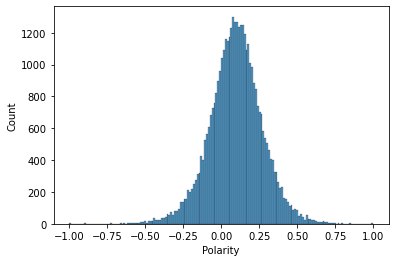

In [25]:
sns.histplot(df['Polarity'])

<AxesSubplot:xlabel='review_length', ylabel='Count'>

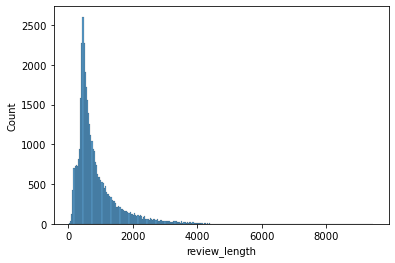

In [26]:
sns.histplot(df['review_length'])

In [27]:
def get_n_counts(corpus,n=None):
    vec=CountVectorizer()
    bag_words=vec.fit_transform(corpus)
    sum_words=bag_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
    return words_freq[:n]

common_words=get_n_counts(df['preprocessed'],20)

for word,freq in common_words:
    print(word,freq)

movie 66966
the 62864
film 59415
one 40322
like 31189
good 22911
this 20644
even 19490
would 19208
time 18663
really 18391
it 18034
see 17920
story 17621
much 15113
well 14777
get 14622
also 14149
great 14133
bad 14104


<AxesSubplot:xlabel='Review Text'>

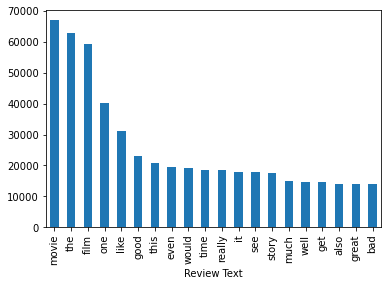

In [28]:
df1=pd.DataFrame(common_words,columns=['Review Text','count'])
df1.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot(kind='bar')

In [165]:
def get_n_counts(corpus,n=None):
    vec=CountVectorizer(ngram_range=(2,2))
    bag_words=vec.fit_transform(corpus)
    sum_words=bag_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
    return words_freq[:n]

common_words=get_n_counts(df['preprocessed'],20)

for word,freq in common_words:
    print(word,freq)   

this movie 4360
the film 2509
this film 2443
the movie 2168
ever seen 2033
ive seen 1729
special effects 1708
the story 1662
dont know 1628
the acting 1523
even though 1504
one best 1462
this one 1319
looks like 1317
the plot 1307
movie the 1231
film the 1145
in fact 1144
much better 1139
waste time 1116


In [166]:
flat_list=[word for i in tok for word in i]

In [167]:
vocab=Counter(flat_list)
print(len(vocab))
print(vocab.most_common(50))

172371
[('movie', 46250), ('The', 42076), ('film', 40757), ('one', 25725), ('like', 20932), ('good', 15383), ('This', 14202), ('would', 13341), ('time', 12604), ('really', 12590), ('It', 12343), ('see', 12124), ('even', 12045), ('story', 11861), ('much', 10226), ('get', 9935), ('bad', 9327), ('people', 9253), ('great', 9243), ('well', 8777), ('movies', 8606), ('made', 8508), ('also', 8504), ('films', 8474), ('make', 8457), ('first', 8437), ('could', 8350), ('way', 8062), ('dont', 8061), ('characters', 8006), ('think', 7717), ('seen', 7265), ('character', 7177), ('watch', 7024), ('But', 6953), ('many', 6895), ('acting', 6769), ('never', 6762), ('know', 6754), ('plot', 6727), ('two', 6705), ('And', 6673), ('Its', 6619), ('little', 6548), ('love', 6403), ('show', 6402), ('best', 6273), ('life', 6253), ('ever', 6207), ('better', 6075)]


In [267]:
X=df['preprocessed']
y=df['label']

In [268]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [269]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28000,)
(12000,)
(28000,)
(12000,)


In [171]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten
from keras.layers import Conv1D,MaxPool1D
from keras.layers import Dropout

In [172]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [173]:
encoded_docs=tokenizer.texts_to_sequences(X_train)

In [175]:
max_length=max([len(w.split()) for w in X_train])

In [176]:
print(max_length)

1460


In [177]:
X_train_1=pad_sequences(encoded_docs,maxlen=max_length,padding='post')

In [178]:
print(X_train_1.shape)

(28000, 1460)


In [179]:
encoded_test_docs=tokenizer.texts_to_sequences(X_test)

In [180]:
X_test_1=pad_sequences(encoded_test_docs,maxlen=max_length,padding='post')

In [141]:
print(X_test_1.shape)

(12000, 1460)


In [181]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

148574


In [49]:
model=Sequential()
model.add(Embedding(vocab_size,100,input_length=max_length))
model.add(Conv1D(filters=32,kernel_size=2,activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1460, 100)         14857400  
                                                                 
 conv1d (Conv1D)             (None, 1459, 32)          6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 729, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 10)                233290    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_1, y_train,validation_data=(X_test_1,y_test), epochs=10, verbose=2,batch_size=32)

Epoch 1/10
875/875 - 122s - loss: 0.5187 - accuracy: 0.7669 - val_loss: 0.3979 - val_accuracy: 0.8741 - 122s/epoch - 139ms/step
Epoch 2/10
875/875 - 126s - loss: 0.2533 - accuracy: 0.9270 - val_loss: 0.3011 - val_accuracy: 0.8799 - 126s/epoch - 144ms/step
Epoch 3/10
875/875 - 134s - loss: 0.0965 - accuracy: 0.9694 - val_loss: 0.3268 - val_accuracy: 0.8759 - 134s/epoch - 153ms/step
Epoch 4/10
875/875 - 130s - loss: 0.0298 - accuracy: 0.9915 - val_loss: 0.4976 - val_accuracy: 0.8717 - 130s/epoch - 148ms/step
Epoch 5/10
875/875 - 135s - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.5940 - val_accuracy: 0.8698 - 135s/epoch - 154ms/step
Epoch 6/10
875/875 - 136s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.6710 - val_accuracy: 0.8688 - 136s/epoch - 155ms/step
Epoch 7/10
875/875 - 127s - loss: 4.7261e-04 - accuracy: 0.9999 - val_loss: 0.7389 - val_accuracy: 0.8712 - 127s/epoch - 145ms/step
Epoch 8/10
875/875 - 133s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.9804 - val_accuracy: 0.867

In [51]:
loss,acc=model.evaluate(X_test_1,y_test)
print('Test Accuracy: %f' % (acc*100))

375/375 [==============================] - 5s 13ms/step - loss: 0.9941 - accuracy: 0.8643
Test Accuracy: 86.425000


# Using Word2Vec

In [247]:
tok=X_train.apply(lambda x:x.split())
tok=tok.values.tolist()

In [216]:
tok

[['Awful',
  'simply',
  'awful',
  'It',
  'proves',
  'theory',
  'star',
  'power',
  'This',
  'supposed',
  'great',
  'TV',
  'guy',
  'directed',
  'battlestar',
  'Titanica',
  'guy',
  'directed',
  'shlop',
  'schtock',
  'schtick',
  'chick',
  'GFind',
  'something',
  'thousand',
  'times',
  'interesting',
  'like',
  'watch',
  'TV',
  'picture',
  'sound',
  'rated',
  'high',
  'bc',
  'arent',
  'negative',
  'scores',
  'IMDbcom',
  'rating',
  'systemZaphoidPS',
  'My',
  'theory',
  'star',
  'power',
  'star',
  'power',
  'used',
  'show',
  'weaker',
  'show',
  'Its',
  'called',
  'indirect',
  'proportionality',
  'quality',
  'power',
  'less',
  'sp',
  'makes',
  'better',
  'quality',
  'etc',
  'Another',
  'way',
  'look',
  'lessZ'],
 ['When',
  'first',
  'saw',
  'film',
  'even',
  'though',
  'saw',
  'recently',
  'changed',
  'mind',
  'think',
  'Robert',
  'Ryans',
  'best',
  'film',
  'portrayed',
  'someone',
  'like',
  'father',
  'schizop

In [252]:
print('Total training sentences: %d' % len(tok))

Total training sentences: 28000


In [217]:
from gensim.models import Word2Vec

In [248]:
word_model=Word2Vec(tok,vector_size=100,window=5,min_count=1)

In [249]:
print(word_model)

Word2Vec(vocab=148573, vector_size=100, alpha=0.025)


In [250]:
words=list(word_model.wv.key_to_index)
words

['movie',
 'the',
 'film',
 'one',
 'like',
 'good',
 'this',
 'even',
 'would',
 'really',
 'time',
 'it',
 'see',
 'story',
 'much',
 'well',
 'get',
 'great',
 'bad',
 'also',
 'people',
 'first',
 'dont',
 'movies',
 'films',
 'made',
 'make',
 'could',
 'way',
 'characters',
 'think',
 'watch',
 'seen',
 'many',
 'character',
 'two',
 'never',
 'but',
 'and',
 'love',
 'little',
 'acting',
 'plot',
 'know',
 'best',
 'show',
 'its',
 'life',
 'ever',
 'better',
 'end',
 'say',
 'still',
 'scene',
 'man',
 'in',
 'scenes',
 'go',
 'something',
 'if',
 'back',
 'he',
 'real',
 'im',
 'watching',
 'thing',
 'didnt',
 'doesnt',
 'actors',
 'years',
 'actually',
 'makes',
 'though',
 'there',
 'funny',
 'look',
 'another',
 'nothing',
 'find',
 'work',
 'lot',
 'new',
 'going',
 'every',
 'old',
 'part',
 'us',
 'cant',
 'things',
 'director',
 'pretty',
 'thats',
 'want',
 'quite',
 'young',
 'seems',
 'cast',
 'around',
 'fact',
 'take',
 'got',
 'world',
 'enough',
 'thought',
 'big

In [281]:
vocab_size=len(words)+1
print(vocab_size)

148574


In [251]:
print('Vocabulary size: %d' % len(words))

Vocabulary size: 148573


In [253]:
filename='embedding_word.txt'
word_model.wv.save_word2vec_format(filename,binary=False)

In [258]:
def load_embedding(filename):
    file=open(filename,'r',encoding='utf-8')
    lines=file.readlines()[1:]
    file.close()
    
    embedding=dict()
    for line in lines:
        part=line.split()
        embedding[part[0]]=np.asarray(part[1:],dtype='float32')
    return embedding

In [259]:
raw_embedding=load_embedding('embedding_word.txt')

In [260]:
raw_embedding

{'movie': array([-0.55358005,  0.44271964, -0.7319841 ,  0.41075018,  0.40828964,
        -0.51428705, -0.9012988 ,  2.7686582 , -1.6210718 , -1.9131328 ,
         1.5792648 ,  0.02714294,  2.0253372 ,  0.54740596,  0.14358051,
        -0.11700985,  1.7323239 , -1.0874362 , -0.7820985 , -3.4531868 ,
         0.09034885, -2.1298292 ,  0.61678046,  0.68135774,  0.24601933,
        -0.2303609 , -0.4769173 ,  0.23431896, -1.1592358 , -1.7848133 ,
         0.7809952 , -0.41764772,  0.364308  , -1.0188454 , -1.1622587 ,
         0.45969436,  1.7205737 ,  1.0407331 , -0.04524309, -1.337951  ,
        -2.0013463 ,  2.100197  , -1.2400362 , -0.62508136,  0.6596813 ,
        -0.9273248 , -0.53181183, -0.5208674 , -0.23453832,  0.9724241 ,
        -1.1862286 ,  1.3006476 , -0.60031563, -0.52467257,  1.6132764 ,
        -1.2727067 , -0.0681786 , -2.4245968 , -0.49594262,  0.3971113 ,
        -0.59830624,  0.09469994,  2.107624  , -0.83809865, -2.66181   ,
         1.2992036 ,  2.8069308 ,  0.84933

In [273]:
def get_weight_matrix(embedding,vocab):
    vocab_size=len(vocab)+1
    
    weight_matrix=np.zeros((vocab_size,100))
    
    for word, i in vocab.items():
        weight_matrix[i]=embedding.get(word)
        
    return weight_matrix

In [275]:
embedding_vector=get_weight_matrix(raw_embedding,tokenizer.word_index)

In [276]:
embedding_vector

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.53580046e-01,  4.42719638e-01, -7.31984079e-01, ...,
         3.85208391e-02,  2.07084656e+00, -1.41787469e+00],
       [-2.00677919e+00, -6.21164031e-02,  2.03387737e+00, ...,
         5.57475269e-01, -2.16383934e+00, -6.99452162e-01],
       ...,
       [-1.45923216e-02,  1.08769778e-02, -6.44291658e-03, ...,
        -9.51892231e-03,  6.30483322e-04, -3.72436433e-03],
       [ 6.74924580e-03,  2.29415935e-04,  6.28288649e-03, ...,
        -9.29076597e-03, -8.07416718e-03,  6.74096402e-03],
       [ 1.26791070e-03,  2.68606134e-02, -1.56005686e-02, ...,
        -1.52795510e-02,  1.66173670e-02,  6.26334641e-03]])

In [282]:
embedding_layer=Embedding(vocab_size,100,weights=[embedding_vector],input_length=max_length,trainable=False)

In [286]:
model=Sequential()
model.add(Embedding(vocab_size,100,input_length=max_length))
model.add(Conv1D(filters=32,kernel_size=2,activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1460, 100)         14857400  
                                                                 
 conv1d_6 (Conv1D)           (None, 1459, 32)          6432      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 729, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 23328)             0         
                                                                 
 dense_11 (Dense)            (None, 10)                233290    
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                      

In [287]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train_1, y_train,validation_data=(X_test_1,y_test), epochs=10, verbose=2,batch_size=32)

Epoch 1/10
875/875 - 106s - loss: 0.0344 - accuracy: 0.9878 - val_loss: 1.3474 - val_accuracy: 0.8053 - 106s/epoch - 122ms/step
Epoch 2/10
875/875 - 87s - loss: 0.0264 - accuracy: 0.9915 - val_loss: 1.0928 - val_accuracy: 0.8274 - 87s/epoch - 100ms/step
Epoch 3/10
875/875 - 92s - loss: 0.0166 - accuracy: 0.9947 - val_loss: 1.2151 - val_accuracy: 0.8169 - 92s/epoch - 105ms/step
Epoch 4/10
875/875 - 96s - loss: 0.0284 - accuracy: 0.9909 - val_loss: 1.1991 - val_accuracy: 0.8233 - 96s/epoch - 110ms/step
Epoch 5/10
875/875 - 91s - loss: 0.0289 - accuracy: 0.9906 - val_loss: 1.2312 - val_accuracy: 0.8267 - 91s/epoch - 104ms/step
Epoch 6/10
875/875 - 92s - loss: 0.0210 - accuracy: 0.9935 - val_loss: 1.3187 - val_accuracy: 0.8272 - 92s/epoch - 106ms/step
Epoch 7/10
875/875 - 91s - loss: 0.0229 - accuracy: 0.9919 - val_loss: 1.4650 - val_accuracy: 0.8234 - 91s/epoch - 104ms/step
Epoch 8/10
875/875 - 94s - loss: 0.0242 - accuracy: 0.9923 - val_loss: 1.4853 - val_accuracy: 0.8195 - 94s/epoch - 1